In [1]:
import jax.numpy as jnp
import numpy as np
from functools import partial
from jax import jit, vmap, tree_util

from functools import lru_cache # import functools for caching
import sys
sys.path.insert(1,'../python_source/')
from chiphifunc import *
from chiphifunc_test_suite import *
from equilibrium import *


double_precision=False

from matplotlib import pyplot as plt

from lambda_coefs_looped import *
from lambda_coefs_shared import *
from lambda_coefs_B_psi import *

import looped_coefs



Configuration has 1.0 field periods.
Axis shape:


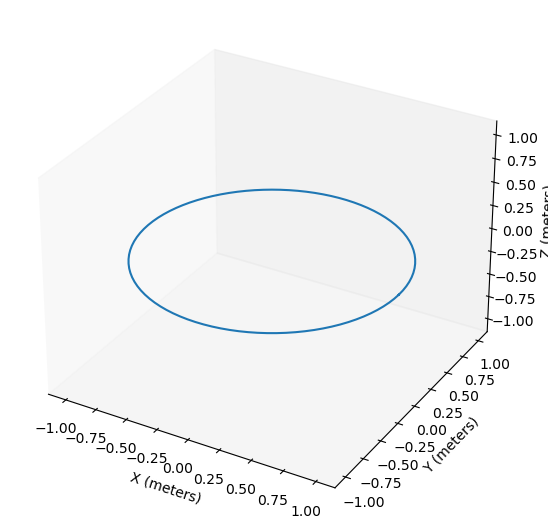

In [2]:

debug_path = '../test_data_eduardo/'

B_psi_coef_cp, B_theta_coef_cp, \
    Delta_coef_cp, p_perp_coef_cp,\
    X_coef_cp, Y_coef_cp, Z_coef_cp, \
    iota_coef, dl_p,\
    nfp, Xi_0, eta, \
    B_denom_coef_c, B_alpha_coef, \
    kap_p, tau_p = read_first_three_orders(
        debug_path+'circ/', 
        R_array=[2,0,1,2,0.0001,0],
        Z_array=[1,2,0,0.001]
    )


In [15]:
equilibrium = Equilibrium.from_known(
    X_coef_cp=X_coef_cp.mask(2),
    Y_coef_cp=Y_coef_cp.mask(2),
    Z_coef_cp=Z_coef_cp.mask(2),
    B_psi_coef_cp=B_psi_coef_cp.mask(0),
    B_theta_coef_cp=B_theta_coef_cp.mask(2),
    B_denom_coef_c=B_denom_coef_c.mask(2),
    B_alpha_coef=B_alpha_coef.mask(1),
    iota_coef=iota_coef.mask(0), 
    kap_p=kap_p, 
    dl_p=dl_p, 
    tau_p=tau_p,
    p_perp_coef_cp = p_perp_coef_cp.mask(2), # no pressure or delta
    Delta_coef_cp = Delta_coef_cp.mask(2),
    magnetic_only=True
)

In [16]:
%%time
lambda_coefs_shared = eval_lambda_coefs_shared(equilibrium)
lambda_coefs_looped = eval_lambda_coefs_looped(equilibrium)
lambda_coefs_B_psi = eval_B_psi_lambdas_full(
    X_coef_cp,
    Y_coef_cp,
    Delta_coef_cp,
    B_alpha_coef,
    B_denom_coef_c,
    dl_p,
    tau_p,
    kap_p,
    iota_coef)

CPU times: user 2min 44s, sys: 13.8 s, total: 2min 57s
Wall time: 2min 13s


In [17]:
lambda_coefs_B_psi['coef_B_psi_dphi_0_dchi_1_in_Y_RHS']
lambda_coefs_B_psi['coef_B_psi_dphi_0_dchi_2_in_Y_RHS']
lambda_coefs_B_psi['coef_B_psi_dphi_1_dchi_0_in_Y_RHS']
lambda_coefs_B_psi['coef_B_psi_dphi_1_dchi_1_in_Y_RHS']
lambda_coefs_B_psi['tensor_fft_op_B_psi_in_all_but_Y']
lambda_coefs_B_psi['coef_B_psi_dphi_1_dchi_0_all_but_Y']
lambda_coefs_B_psi['coef_B_psi_dphi_2_dchi_0_all_but_Y']
lambda_coefs_B_psi['coef_B_psi_dphi_3_dchi_0_all_but_Y']

lambda_coefs_looped['lambda_B_psi_nm2_in_Z_n']
lambda_coefs_looped['lambda_B_psi_nm2_in_X_n']
lambda_coefs_looped['lambda_dphi_B_psi_nm2_in_X_n']
lambda_coefs_looped['lambda_B_psi_nm2_in_Delta_n']
lambda_coefs_looped['lambda_dphi_B_psi_nm2_in_Delta_n']
lambda_coefs_looped['lambda_dchi_B_psi_nm2_in_X_n']
lambda_coefs_looped['lambda_B_psi_nm2_in_p_n']
lambda_coefs_looped['lambda_dchi_B_psi_nm2_in_p_n']
lambda_coefs_looped['lambda_dphi_B_psi_nm2_in_p_n']

lambda_coefs_shared['lambda_coef_Yn1p_in_D3']
lambda_coefs_shared['lambda_coef_dp_Yn1p_in_D3']

<function lambda_coefs_shared.eval_lambda_coefs_shared.<locals>.lambda_coef_dp_Yn1p_in_D3(vector_free_coef, nfp)>

# B_psi coefficients

In [18]:
lambda_coefs_B_psi['coef_B_psi_dphi_0_dchi_1_in_Y_RHS']
lambda_coefs_B_psi['coef_B_psi_dphi_0_dchi_2_in_Y_RHS']
lambda_coefs_B_psi['coef_B_psi_dphi_1_dchi_0_in_Y_RHS']
lambda_coefs_B_psi['coef_B_psi_dphi_1_dchi_1_in_Y_RHS']
lambda_coefs_B_psi['coef_B_psi_dphi_1_dchi_0_all_but_Y']
lambda_coefs_B_psi['coef_B_psi_dphi_2_dchi_0_all_but_Y']
lambda_coefs_B_psi['coef_B_psi_dphi_3_dchi_0_all_but_Y']


lambda_coefs_B_psi['tensor_fft_op_B_psi_in_all_but_Y']

<function lambda_coefs_B_psi.eval_B_psi_lambdas_full.<locals>.<lambda>(n_eval, to_tensor_fft_op_multi_dim)>

In [9]:
n_eval=10

In [14]:
looped_coefs.coef_B_psi_dphi_0_dchi_1_in_Y_RHS(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef)
looped_coefs.coef_B_psi_dphi_0_dchi_2_in_Y_RHS(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef)
looped_coefs.coef_B_psi_dphi_1_dchi_0_in_Y_RHS(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef)
looped_coefs.coef_B_psi_dphi_1_dchi_1_in_Y_RHS(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef)
looped_coefs.coef_B_psi_dphi_1_dchi_0_all_but_Y(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef)
looped_coefs.coef_B_psi_dphi_2_dchi_0_all_but_Y(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef)
looped_coefs.coef_B_psi_dphi_3_dchi_0_all_but_Y(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef)


In [19]:
print(np.all(np.isclose(lambda_coefs_B_psi['coef_B_psi_dphi_0_dchi_1_in_Y_RHS'](n_eval).content, looped_coefs.coef_B_psi_dphi_0_dchi_1_in_Y_RHS(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef).content)))
print(np.all(np.isclose(lambda_coefs_B_psi['coef_B_psi_dphi_0_dchi_2_in_Y_RHS'](n_eval).content, looped_coefs.coef_B_psi_dphi_0_dchi_2_in_Y_RHS(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef).content)))
print(np.all(np.isclose(lambda_coefs_B_psi['coef_B_psi_dphi_1_dchi_0_in_Y_RHS'](n_eval).content, looped_coefs.coef_B_psi_dphi_1_dchi_0_in_Y_RHS(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef).content)))
print(np.all(np.isclose(lambda_coefs_B_psi['coef_B_psi_dphi_1_dchi_1_in_Y_RHS'](n_eval).content, looped_coefs.coef_B_psi_dphi_1_dchi_1_in_Y_RHS(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef).content)))
print(np.all(np.isclose(lambda_coefs_B_psi['coef_B_psi_dphi_1_dchi_0_all_but_Y'](n_eval).content, looped_coefs.coef_B_psi_dphi_1_dchi_0_all_but_Y(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef).content)))
print(np.all(np.isclose(lambda_coefs_B_psi['coef_B_psi_dphi_2_dchi_0_all_but_Y'](n_eval).content, looped_coefs.coef_B_psi_dphi_2_dchi_0_all_but_Y(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef).content)))
print(np.all(np.isclose(lambda_coefs_B_psi['coef_B_psi_dphi_3_dchi_0_all_but_Y'](n_eval).content, looped_coefs.coef_B_psi_dphi_3_dchi_0_all_but_Y(n_eval, X_coef_cp, Y_coef_cp, Delta_coef_cp, B_alpha_coef, B_denom_coef_c, dl_p, tau_p, kap_p, iota_coef).content)))

True
True
True
True
True
True
True


# B_psi coeffs in other terms

In [20]:
lambda_coefs_looped['lambda_B_psi_nm2_in_Z_n'](n_eval)
lambda_coefs_looped['lambda_B_psi_nm2_in_X_n'](n_eval)
lambda_coefs_looped['lambda_dphi_B_psi_nm2_in_X_n'](n_eval)
lambda_coefs_looped['lambda_B_psi_nm2_in_Delta_n'](n_eval)
lambda_coefs_looped['lambda_dphi_B_psi_nm2_in_Delta_n'](n_eval)
lambda_coefs_looped['lambda_dchi_B_psi_nm2_in_X_n'](n_eval)
lambda_coefs_looped['lambda_B_psi_nm2_in_p_n'](n_eval)
lambda_coefs_looped['lambda_dchi_B_psi_nm2_in_p_n'](n_eval)
lambda_coefs_looped['lambda_dphi_B_psi_nm2_in_p_n'](n_eval)

DeviceArray(0.222222, dtype=float64)

In [21]:
looped_coefs.lambda_B_psi_nm2_in_Z_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p)
looped_coefs.lambda_B_psi_nm2_in_X_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p)
looped_coefs.lambda_dphi_B_psi_nm2_in_X_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p)
looped_coefs.lambda_B_psi_nm2_in_Delta_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p)
looped_coefs.lambda_dphi_B_psi_nm2_in_Delta_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p)
looped_coefs.lambda_dchi_B_psi_nm2_in_X_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p)
looped_coefs.lambda_B_psi_nm2_in_p_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p)
looped_coefs.lambda_dchi_B_psi_nm2_in_p_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p)
looped_coefs.lambda_dphi_B_psi_nm2_in_p_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p)

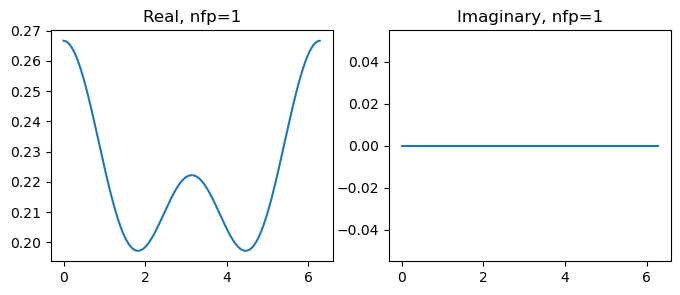

In [27]:
looped_coefs.lambda_dphi_B_psi_nm2_in_p_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p).display_content()

In [21]:
print(np.all(np.isclose(lambda_coefs_looped['lambda_B_psi_nm2_in_Z_n'](n_eval).content, looped_coefs.lambda_B_psi_nm2_in_Z_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p).content)))
print(np.all(np.isclose(lambda_coefs_looped['lambda_B_psi_nm2_in_X_n'](n_eval).content, looped_coefs.lambda_B_psi_nm2_in_X_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p).content)))
print(np.all(np.isclose(lambda_coefs_looped['lambda_dphi_B_psi_nm2_in_X_n'](n_eval).content, looped_coefs.lambda_dphi_B_psi_nm2_in_X_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p).content)))
print(np.all(np.isclose(lambda_coefs_looped['lambda_B_psi_nm2_in_Delta_n'](n_eval).content, looped_coefs.lambda_B_psi_nm2_in_Delta_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p).content)))
print(np.all(np.isclose(lambda_coefs_looped['lambda_dphi_B_psi_nm2_in_Delta_n'](n_eval).content, looped_coefs.lambda_dphi_B_psi_nm2_in_Delta_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p).content)))
print(np.all(np.isclose(lambda_coefs_looped['lambda_dchi_B_psi_nm2_in_X_n'](n_eval).content, looped_coefs.lambda_dchi_B_psi_nm2_in_X_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p).content)))
print(np.all(np.isclose(lambda_coefs_looped['lambda_B_psi_nm2_in_p_n'](n_eval).content, looped_coefs.lambda_B_psi_nm2_in_p_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p).content)))
print(np.all(np.isclose(lambda_coefs_looped['lambda_dchi_B_psi_nm2_in_p_n'](n_eval).content, looped_coefs.lambda_dchi_B_psi_nm2_in_p_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p).content)))
print(np.all(np.isclose(lambda_coefs_looped['lambda_dphi_B_psi_nm2_in_p_n'](n_eval).content, looped_coefs.lambda_dphi_B_psi_nm2_in_p_n(n_eval, X_coef_cp, Y_coef_cp, B_theta_coef_cp, B_psi_coef_cp, iota_coef, p_perp_coef_cp, Delta_coef_cp, B_denom_coef_c, B_alpha_coef, kap_p, dl_p, tau_p).content)))

True
True
True
True
True
True
True
True
True


# Y coeffs in D3

In [59]:
nfp

1

In [54]:
free_coef = np.random.random((2,1000))
lambda_coefs_shared['lambda_coef_Yn1p_in_D3'](free_coef,nfp)
lambda_coefs_shared['lambda_coef_dp_Yn1p_in_D3'](free_coef,nfp)

In [55]:
looped_coefs.lambda_coef_Yn1p_in_D3(free_coef, X_coef_cp, Y_coef_cp, iota_coef, dl_p, tau_p, 5)
looped_coefs.lambda_coef_dp_Yn1p_in_D3(free_coef, X_coef_cp, Y_coef_cp, iota_coef, dl_p, tau_p, 5)

In [62]:
print(np.all(np.isclose(lambda_coefs_shared['lambda_coef_Yn1p_in_D3'](free_coef,nfp).content, looped_coefs.lambda_coef_Yn1p_in_D3(free_coef, X_coef_cp, Y_coef_cp, iota_coef, dl_p, tau_p, nfp).content)))
print(np.all(np.isclose(lambda_coefs_shared['lambda_coef_dp_Yn1p_in_D3'](free_coef,nfp).content, looped_coefs.lambda_coef_dp_Yn1p_in_D3(free_coef, X_coef_cp, Y_coef_cp, iota_coef, dl_p, tau_p, nfp).content)))

True
True


In [ ]:
_Z_n
